<AxesSubplot:title={'center':'NDAQ 2010-2021'}, xlabel='Date'>

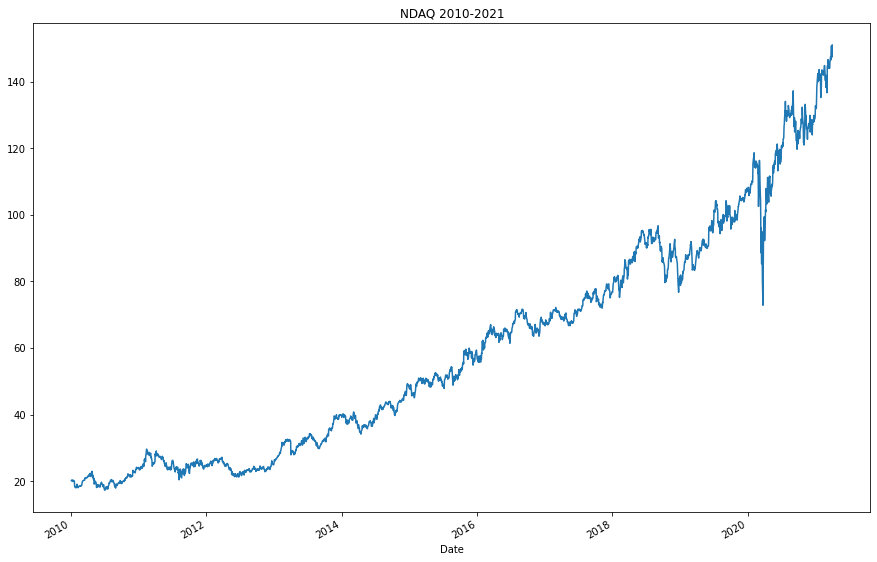

In [14]:
from pandas_datareader import DataReader # pip install pandas-datareader
from pandas_datareader import data
from datetime import datetime
from scipy.stats import skew
from sklearn.linear_model import LinearRegression

import numpy as np 
import seaborn as sns 
import pandas as pd
import plotly as ply

from scipy import stats

 
start = pd.to_datetime('2010-01-01') # in YYYY-MM-DD format
end = pd.to_datetime('today')
ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo
ts.Close.plot(figsize=(15,10), title = "NDAQ 2010-2021")
#PLAIN DATA

In [3]:
#showing skew of original data 
#example of commitskew(ts.Close)

/Users/lukeseckerson/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

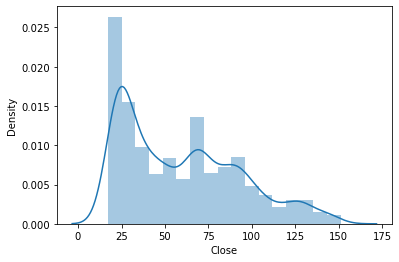

In [4]:
sns.distplot(ts.Close)

In [5]:
#johnson transformation 
transformed_data, fitted_lambda = stats.yeojohnson(ts.Close)
skew(transformed_data)

-0.015150027953553333

In [6]:
print(fitted_lambda)

0.05940054715159236


In [7]:
#manual johnson transformation
test_Data = ((ts.Close + 1)**fitted_lambda - 1) / fitted_lambda
skew(test_Data)

-0.015150027953553333

In [8]:
#attempt reverse 
restored_Data = (((fitted_lambda*test_Data)+1)**(1/fitted_lambda)) - 1
skew(restored_Data)

0.6333396446299364

In [111]:
#checking values in ts.Close that they are (stictly) positive/negative. For deciding which reverse transfrom to use
#here 0 is positive 
postive = 1
for x in ts.Close: 
    if x < 0:
        postive = 0
        
        
print(postive)

1


In [10]:
#Euler's number (for natrual log)
e = np.exp(1) 
print(e)

2.718281828459045


In [152]:
#different reverse transforms based on lambda and original data 
#generally our data should be all postive majority of the time so first function is the main one being used 
if fitted_lambda != 0 and postive == 1:
    
    restored_Data = (((fitted_lambda*transformed_data)+1)**(1/fitted_lambda)) - 1
    print("First function")
    
elif fitted_lambda == 0 and postive == 1:
    
    e = np.exp(1)
    restored_Data = (e**transformed_data - 1)
    print("Second function")
    
elif fitted_lambda != 2 and postive == 0:
    
    restored_Data = -((((-transformed_data*(2-fitted_lambda)) +1)**(1/(2-fitted_lambda))) -1)
    print("Third Function")
    
elif fitted_lambda == 2 and postive == 0:
    
    e = np.exp(1)
    restored_Data = (-e**-transformed_data) + 1
    print("Fourth function")

First function


In [12]:
#reversed data should equal original skew
skew(restored_Data)

0.6333396446299364

In [13]:
#original data, off by a negligble amount ....98 instead of ....93
skew(ts.Close)

0.6333396446299359

In [19]:
#From here on it's just testing the johnson method

0.5936004596374715

In [138]:
transformed_data[0] = ((((fitted_lambda*transformed_data[0])+1)**(1/fitted_lambda)) - 1)
transformed_data[1] = ((((fitted_lambda*transformed_data[1])+1)**(1/fitted_lambda)) - 1)
transformed_data[2] = -((((-transformed_data[2]*(2-fitted_lambda)) +1)**(1/(2-fitted_lambda))) -1)
transformed_data[3] = -((((-transformed_data[3]*(2-fitted_lambda)) +1)**(1/(2-fitted_lambda))) -1)
transformed_data[4] = -((((-transformed_data[4]*(2-fitted_lambda)) +1)**(1/(2-fitted_lambda))) -1)
transformed_data[5] = -((((-transformed_data[5]*(2-fitted_lambda)) +1)**(1/(2-fitted_lambda))) -1)

restoredData = transformed_data
skew(restoredData)

-1.1489674711686564

In [103]:
#for positive only and lambda != 0
#restored_Data = ((((fitted_lambda*transformed_data)+1)**(1/fitted_lambda)) - 1)

#for negative only and lambda != 2
#restored_Data = -((((-transformed_data*(2-fitted_lambda)) +1)**(1/(2-fitted_lambda))) -1)

#for inbetween? 
e = np.exp(1)
#restored_Data = (e**transformed_data - 1)

#the negative inbetween

e = np.exp(1)
#restored_Data = (-e**-transformed_data) + 1

skew(transformed_data)

-1.1489674711686564

In [181]:
#skew of original array

#distribution with only positive values
positiveArray = np.array([1, 3, 4, 5, 9])
#skew(positiveArray)

negativeArray = np.array([2, 0, 2, 11, 30, 70])
skew(negativeArray)

1.2382850578806233

In [182]:
#transformation of original data + skew of transforemed data
transformed_data, fitted_lambda = stats.yeojohnson(negativeArray)
skew(transformed_data)
#print(fitted_lambda)

0.0448826038962004

In [183]:
#proper reverse transformation

#for some reason when you run this twice it throws up an error but oh well it'll be grand 

#This wants an array called transformed data and a fitted lambda from the yeo-johnson method 
#gives a "restored array" of the same length as the original. 
#int positive = 1;
index = 0;
restored_Data = transformed_data
for x in transformed_data:
    
    if x >= 0:
        positive = 1
    elif x < 0:
        positive = 0
        
   
    
    if (fitted_lambda != 0 and positive == 1):
        
        restored_Data[index] = (((fitted_lambda*x)+1)**(1/fitted_lambda)) - 1
        #print("First function")
        
    elif fitted_lambda == 0 and positive == 1:
    
        e = np.exp(1)
        restored_Data[index] = (e**x - 1)
        #print("Second function")
    
    elif fitted_lambda != 2 and positive == 0:
    
        restored_Data[index] = -((((-x*(2-fitted_lambda)) +1)**(1/(2-fitted_lambda))) -1)
        #print("Third Function")
    
    elif fitted_lambda == 2 and positive == 0:
    
        e = np.exp(1)
        restored_Data[index] = (-e**-x) + 1
        #print("Fourth function")
        
    
    index = index + 1
        


skew(restored_Data)

1
1
1
1
1
1


1.2382850578806253